# HW 4


### Goals
* You are going to train ridge regression using SGD.
* Ridge regression has the cost function = MSE + alpha*||w||^2, where ||w|| is the Euclidean norm.
* The goal is to find two optimal hyperparameters 

  1.   learning rate of SGD and 
  2.   alpha.




### Instructions
1. Randomly split the data into 80% training data and 20% testing data. Then split the training data again into 75% training data and 25% validation data. Keep this split fixed.

2. Use SGDRegressor(max_iter=1000, tol=-np.infty, warm_start=True, penalty="l2", learning_rate="constant", random_state=0, alpha=alpha, eta0=eta0)
What does this do? Comment on the choice of arguments above.
Here alpha and eta0 are the value you are going to provide as the regularization weight and the learning rate.

3. For each combinations of alphas = [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1], eta0s = [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1] 
  1.   instantiate SGDRegressor,
  2.   call fit(),
  3.   call predict() and measure training and validation error (MSE).


4. Report the training and validation error for each combination. Which combination has the smallest validation error?

5. Now use these hyperparameters to retrain the model from scratch using ALL training data (=train + validation sets).Plot the training and test error as a function of epochs. You might want to use SGDRegressor(max_iter=1, ... )

6. Report the test score or this final model, and also plot the test data vs final linear regression as a line.

### 0. Generate Data and Imports


In [106]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(0)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [107]:
# Generating Data
np.random.seed(0)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.3 * X**2 + 2*np.random.randn(m, 1)
y = y.reshape((m))



### 1. Splitting Train and Test data

1. Randomly split the data into 80% training data and 20% testing data. Then split the training data again into 75% training data and 25% validation data. Keep this split fixed.

In [108]:
# Training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_full_train, y_full_train = X_train, y_train # Remember the full training set

In [109]:
# Split Validation and Training
print(X_train.size)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

print(X_train.size)


80
60


### 2. SGDRegressor

1. Use SGDRegressor(max_iter=1000, tol=-np.infty, warm_start=True, penalty="l2", learning_rate="constant", random_state=0, alpha=alpha, eta0=eta0) 
2. What does this do? 
3. Comment on the choice of arguments above. Here alpha and eta0 are the value you are going to provide as the regularization weight and the learning rate.

*  max_iter=1000
  * The maximum number of iterations the regressor will run is 1000. Set at 1000 for performance purposes.
*  tol=-np.infty
  * This ties in nicely with max_iter. This makes sure that the program will never stop until it hits the maximum iterations since the tolerance will never be -∞.
*  warm_start=True
  * Reuses the previous call to SGDRegressor in order to initialize. Makes the epoch iteration work.  
*  penalty="l2"
  * The penalty makes it so that the Regressor gets closer to the local minimum.
*  learning_rate="constant"
  * The adjustment to the learning rate such that eta = eta0 or eta is 'constant'.
*  random_state=0 
  * Random state 
*  alpha=alpha
  * Alpha is a multiplier to the penalty value.
*  eta0=eta0
  * Eta0 is the learning rate.




### 3. Search for Optimal Values of α and η 


For each combinations of 

alphas = [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1]

eta0s = [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1]

    instantiate SGDRegressor,
    call fit(),
    call predict() and measure training and validation error (MSE).



In [110]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

grid = {'alpha': [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1], 'eta0' : [1E-6,1E-5,1E-4,1E-3,1E-2,1E-1]}
mse = {'alpha' : [], 'eta': [] , 'val_mse' : [], 'train_mse' : []}

minimum = 9999
mini = []

for alpha in grid['alpha']:
  for eta0 in grid['eta0']:
    sgd = SGDRegressor(max_iter=1000, tol=-np.infty, warm_start=True, penalty="l2", learning_rate="constant", random_state=0, alpha=alpha, eta0=eta0)
    sgd.fit(X_train, y_train) # Fit
    y_val_predicts = sgd.predict(X_val) # Predict for validation set
    y_train_predicts = sgd.predict(X_train) # Predict for training set

    mse['alpha'].append(alpha)
    mse['eta'].append(eta0)

    val = mean_squared_error(y_val_predicts, y_val)
    train = mean_squared_error(y_train_predicts, y_train)
    mse['val_mse'].append(val) # Obtain mse values 
    mse['train_mse'].append(train) # Obtain mse values

    if val <= minimum:
        minimum = val
        mini = [alpha, eta0]
  

### 4. Combination with the smallest error

In [111]:
print('alpha  |  eta  |  val_mse | train_mse')
print(tabulate(mse))

alpha  |  eta  |  val_mse | train_mse
------  ------  --------  --------
1e-06   1e-06   18.0474   15.0145
1e-06   1e-05    9.19353   7.48338
1e-06   0.0001   4.16563   4.15857
1e-06   0.001    4.15663   4.15852
1e-06   0.01     4.10589   4.2002
1e-06   0.1      4.1234    4.82351
1e-05   1e-06   18.0474   15.0145
1e-05   1e-05    9.19354   7.48338
1e-05   0.0001   4.16562   4.15857
1e-05   0.001    4.15663   4.15852
1e-05   0.01     4.10589   4.2002
1e-05   0.1      4.12341   4.82351
0.0001  1e-06   18.0474   15.0145
0.0001  1e-05    9.19355   7.48339
0.0001  0.0001   4.16561   4.15857
0.0001  0.001    4.15661   4.15852
0.0001  0.01     4.10589   4.20023
0.0001  0.1      4.12343   4.82355
0.001   1e-06   18.0474   15.0146
0.001   1e-05    9.19366   7.48354
0.001   0.0001   4.16541   4.15857
0.001   0.001    4.15642   4.15852
0.001   0.01     4.10588   4.20045
0.001   0.1      4.12371   4.82396
0.01    1e-06   18.0476   15.0147
0.01    1e-05    9.19476   7.48497
0.01    0.0001   4.16353

In [112]:
print(mini) # The combination with the smallest errors is alpha= 0.01 and eta0= 0.01.

[0.01, 0.01]


### 5. Retrain using new hyperparameters

* Now use these hyperparameters to retrain the model from scratch using ALL training data (=train + validation sets).

* Plot the training and test error as a function of epochs. You might want to use SGDRegressor(max_iter=1, ... )

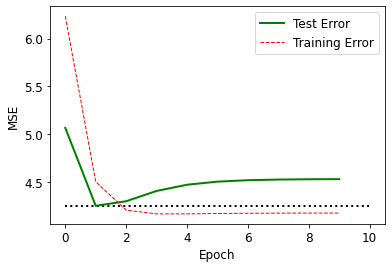

In [113]:
# Best alpha and eta combination
alpha = 0.01 
eta0 = 0.01

num_epochs = 10
sgd = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty="l2", learning_rate="constant", random_state=0, alpha=alpha, eta0=eta0)

train_errors, test_errors = [], []
for epoch in range(num_epochs):
    sgd.fit(X_full_train, y_full_train) # Fit on full train
    y_train_predict = sgd.predict(X_full_train) # Train prediction 
    y_test_predict = sgd.predict(X_test) # Test prediction
    train_errors.append(mean_squared_error(y_full_train, y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

best_epoch = np.argmin(test_errors)
best_val_mse = test_errors[best_epoch]

plt.plot([0, num_epochs], [best_val_mse, best_val_mse], "k:", linewidth=2)
plt.plot((test_errors), "g-", linewidth=2, label="Test Error")
plt.plot((train_errors), "r--", linewidth=1, label="Training Error")
plt.legend(loc="upper right", fontsize=12)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.show()

### 6. Plotting test score
* Report the test score or this final model, and also plot the test data vs final linear regression as a line.

Test MSE:  4.530437537377099


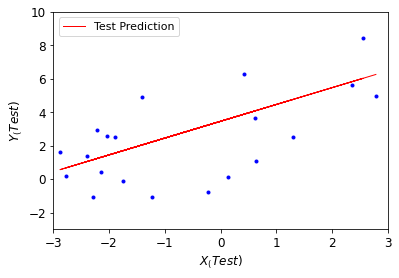

In [116]:
print("Test MSE: ", mean_squared_error(y_test, y_test_predict))

# Visualize Linear Regression and the test data
plt.plot(X_test, y_test_predict, "r-", linewidth=1, label= "Test Prediction")
plt.plot(X_test, y_test, "b.")
plt.xlabel("$X Test$", fontsize=12)
plt.ylabel("$Y Test$", rotation=90, fontsize=12)
plt.legend(loc="upper left", fontsize=11)
plt.axis([-3, 3, -3, 10])
plt.show()